## __Transfer Learning__
- Transfer learning refers to a technique in machine learning where a pre-trained model, typically trained on a large dataset, is used as a starting point for solving a different but related task.
- It involves using models trained on one problem as a starting point for a related problem.
- It is flexible, allowing the use of pre-trained models directly, as feature extraction preprocessing, and integrated into entirely new models.



## Steps to Be Followed:
1. Importing the required libraries
2. Adding classifier layers
3. Preprocessing and feature extraction

In [1]:
#only for mac or when you get an ssl warning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #deactivate SSL Cert Error


# Exercise 1

VGG16 is a convolutional neural network model that’s used for image recognition. It’s unique in that it has only 16 layers that have weights, as opposed to relying on a large number of hyper-parameters. It’s considered one of the best vision model architectures.

![vgg16](https://miro.medium.com/v2/resize:fit:827/1*UeAhoKM0kJfCPA03wt5H0A.png)

### Step 1: Importing the Required Libraries

- The **from tensorflow.keras.utils import load_img** is used to load an image file from the file system.

- The **from tensorflow.keras.utils import img_to_array** is used to convert an image loaded with load_img into a NumPy array.

- The **from keras.applications.vgg16 import preprocess_input** is used to preprocess the input image array before feeding it to the VGG16 model. VGG16 expects the input images to be preprocessed in a specific way.

- The **from keras.applications.vgg16 import VGG16** is used to import the VGG16 model architecture. VGG16 is a popular convolutional neural network model pre-trained on the ImageNet dataset for image classification.

In [2]:
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array

# import a pretrain model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np

#### Standard VGG16

In [3]:
model = VGG16() 
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Now let's test the default model on a new image

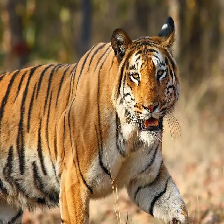

In [20]:
#load the image
my_image = load_img('datasets/tiger.jpeg', target_size=(224, 224)) #resizing the image for VGG16 compatibility (expects this size only)
my_image

In [21]:
# convert the image pixels to numpy array

my_image_arr = img_to_array(my_image) #or my_image = np.array(my_image)
my_image_arr[:2]

array([[[120., 102.,  62.],
        [126., 107.,  67.],
        [129., 109.,  72.],
        ...,
        [128., 112.,  87.],
        [132., 116.,  91.],
        [137., 121.,  96.]],

       [[120., 102.,  62.],
        [126., 106.,  69.],
        [129., 109.,  72.],
        ...,
        [126., 110.,  85.],
        [130., 114.,  89.],
        [136., 120.,  95.]]], dtype=float32)

In [22]:
my_image_arr.shape

(224, 224, 3)

In [23]:
# reshape the data for model compatibility
my_image_arr = my_image_arr.reshape((1, my_image_arr.shape[0], my_image_arr.shape[1], my_image_arr.shape[2]))

#prepare the image

my_image_arr = preprocess_input(my_image_arr) # keras image utility for imagenet compatibility 
my_image_arr[:2]

array([[[[-41.939003 , -14.778999 ,  -3.6800003],
         [-36.939003 ,  -9.778999 ,   2.3199997],
         [-31.939003 ,  -7.7789993,   5.3199997],
         ...,
         [-16.939003 ,  -4.7789993,   4.3199997],
         [-12.939003 ,  -0.7789993,   8.32     ],
         [ -7.939003 ,   4.2210007,  13.32     ]],

        [[-41.939003 , -14.778999 ,  -3.6800003],
         [-34.939003 , -10.778999 ,   2.3199997],
         [-31.939003 ,  -7.7789993,   5.3199997],
         ...,
         [-18.939003 ,  -6.7789993,   2.3199997],
         [-14.939003 ,  -2.7789993,   6.3199997],
         [ -8.939003 ,   3.2210007,  12.32     ]],

        [[-48.939003 , -21.779    , -10.68     ],
         [-42.939003 , -18.779    ,  -5.6800003],
         [-37.939003 , -15.778999 ,  -2.6800003],
         ...,
         [-20.939003 ,  -8.778999 ,   0.3199997],
         [-16.939003 ,  -4.7789993,   4.3199997],
         [-10.939003 ,   1.2210007,  10.32     ]],

        ...,

        [[-33.939003 , -41.779    , -4

#### Make Prediction Using VGG16

In [28]:
# perform prediction on the image
prediction = model.predict(my_image_arr)

#decode the prediction
decoded_predictions = decode_predictions(prediction)
decoded_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


[[('n02129604', 'tiger', 0.8000071),
  ('n02123159', 'tiger_cat', 0.19970883),
  ('n02127052', 'lynx', 0.00012133386),
  ('n02128925', 'jaguar', 0.00010900327),
  ('n02128385', 'leopard', 1.3247074e-05)]]

In [29]:
# cleared output
decoded_predictions

[[('n02129604', 'tiger', 0.8000071),
  ('n02123159', 'tiger_cat', 0.19970883),
  ('n02127052', 'lynx', 0.00012133386),
  ('n02128925', 'jaguar', 0.00010900327),
  ('n02128385', 'leopard', 1.3247074e-05)]]

output above has the top 5 labels with their probabilities. The output can be enhanced using the following: 

In [38]:
## more readable output
for i, (imagenet_id, label, prob) in enumerate(decoded_predictions[0]):
    print(f'{i + 1}: {label} ({prob:2.2%})')

1: tiger (80.00%)
2: tiger_cat (19.97%)
3: lynx (0.01%)
4: jaguar (0.01%)
5: leopard (0.00%)


## Customization: Adding Classifier Layers and Different Dimensions
- It demonstrates how to load a pre-trained VGG16 model without its classifier layers and then add new custom classifier layers on top of it.
- The new model is defined by connecting the output of the pre-trained VGG16 model to a flatten layer, followed by a dense layer with 1024 units and ReLU activation, and finally a dense layer with 10 units and softmax activation for multi-class classification.
- The model summary provides an overview of the architecture and layer configurations.

### Customized VGG16

> NOTE: It's generally recommended to use input sizes that are close to the original size (224, 224) used during pre-training, as significant changes in input size may negatively impact the model's performance. If you need to work with significantly different input sizes, you may need to fine-tune the pre-trained model or consider using a different pre-trained model that was trained on a dataset with input sizes closer to your requirements.



In [28]:
del model

In [33]:
inp_sh=(300,300,3) # custom input

model = VGG16(weights='imagenet',
              include_top=False, #removes the fully connected layer
               input_shape=inp_sh) 

# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False
#if you don;t do this your whole model will start training again and again. lots of GPU power

#using the power of VGG16 to solve for my specific problem
flat_layer = Flatten()(model.output) # grab the last layer or use 
hidden_layer = Dense(1024, activation='relu')(flat_layer) #append the flat layer to the hidden layer
output_layer = Dense(2, activation='softmax')(hidden_layer) #customize it to 2 classes - current layer has 1000 categories

model = Model(inputs=model.inputs, outputs=output_layer)

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 300, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 150, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 75, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    42,468,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,185,090 (218.14 MB)

 Trainable params: 42,470,402 (162.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Observation**
- Running the example defines the new model ready for training and summarizes the model architecture.
- We have flattened the output of the last pooling layer and added our new fully connected layers.
-The weights of the VGG16 model and the weights for the new model will all be trained together on the new dataset.

### Step 3: Preprocessing and Feature Extraction
- The image is loaded from a file and preprocessed to meet the input requirements of the VGG16 model (resizing, converting to a numpy array, and reshaping).

- The modified model is used to predict and extract features from the input image, resulting in a feature vector with a specific shape.

In [30]:
my_image = load_img('datasets/tiger.jpeg', target_size=(300, 300)) 
# convert the image pixels to numpy array
my_image_arr = img_to_array(my_image) 

my_image_arr = np.expand_dims(my_image_arr, axis=0)
my_image_arr = preprocess_input(my_image_arr)  # Preprocess the input data


In [31]:
# Make predictions
pred = model.predict(my_image_arr)
class_index = np.argmax(pred)
class_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


0

In [ ]:
class_labels = ['lion','leopard','tiger', 'other']  # Replace with your class labels
predicted_class = class_labels[class_index]

In [26]:
predicted_class

'lion'

In [ ]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
features = model.predict(image)
print(features.shape)

In [27]:
# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom fully connected layer(s)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Pre-process the input image
from keras.preprocessing import image
img = load_img('datasets/tiger.jpeg', target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Preprocess the input data

# Make predictions
preds = model.predict(x)
class_index = np.argmax(preds)
class_labels = ['lion','tiger', 'other']  # Replace with your class labels
predicted_class = class_labels[class_index]

print(f'The predicted class for the image is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
The predicted class for the image is: lion


**Observation**

- The VGG16 model weights are downloaded and loaded successfully, and the extracted features from the input image have a shape of (1, 4096).

In [33]:
from keras.applications import VGG16

# Load the VGG16 model with pre-trained weights, excluding the top layers
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
vgg16_model.trainable = False


In [34]:
from keras.layers import Flatten, Dense

# Add a flatten layer to convert the 3D feature maps to a 1D vector
x = vgg16_model.output
x = Flatten()(x)

# Add a hidden layer with 1024 neurons and ReLU activation
x = Dense(1024, activation='relu')(x)

# Add the output layer with the number of classes you want to predict (replace 'num_classes' with your actual number of classes)
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model with the pre-trained VGG16 model and your custom layers
model = Model(inputs=vgg16_model.input, outputs=predictions)


NameError: name 'num_classes' is not defined

# Exercise 2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the pre-trained ResNet50 model without the top (classification) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
model = Sequential([
    base_model,  # Add the pre-trained ResNet50 model as the base
    Flatten(),  # Flatten the output feature maps to a 1D vector
    Dense(256, activation='relu'),  # Add a fully connected layer with 256 neurons and ReLU activation
    Dense(10, activation='softmax')  # Add a softmax output layer with 10 units for classification
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess your own dataset (similar to the previous example)

# Train the model using the data generators (similar to the previous example)


# Exercise 3

`pip install tensorflow_hub`

`pip install opencv-python`

In [28]:
import numpy as np
import cv2 #pip install opencv-python

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)

In [32]:
input_img_shape = (224, 224, 3)

classifier = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=input_img_shape+(3,))